In [18]:
library(DescTools)
library(car)
library(carData)
library(datasets)
library(tseries)
library(statip)
library(tsoutliers)

#This step might generate a warning, please note that this is not an error.

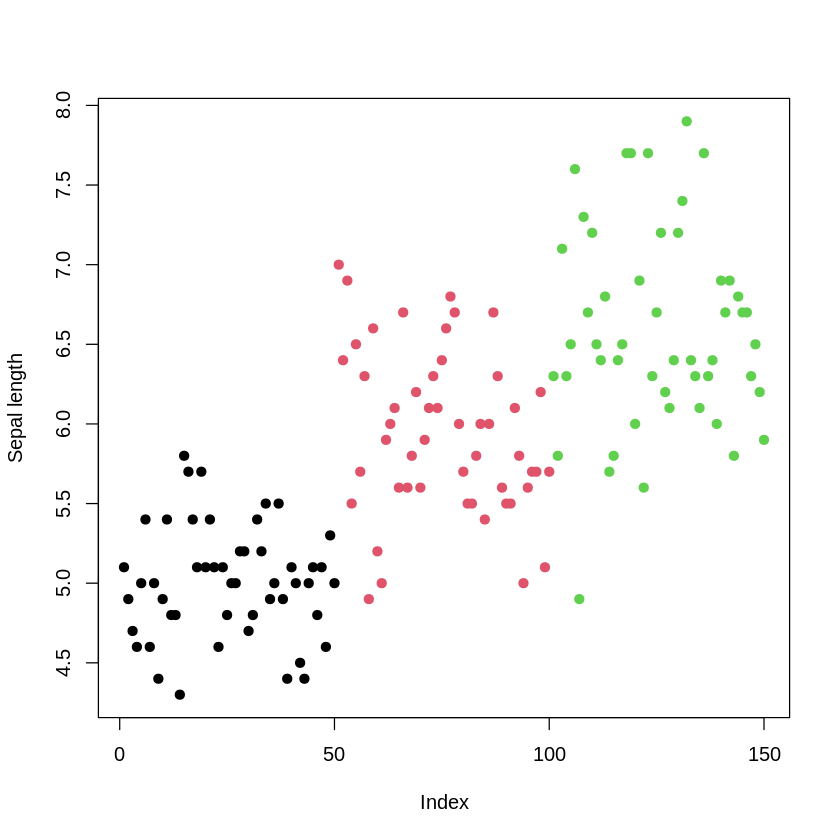

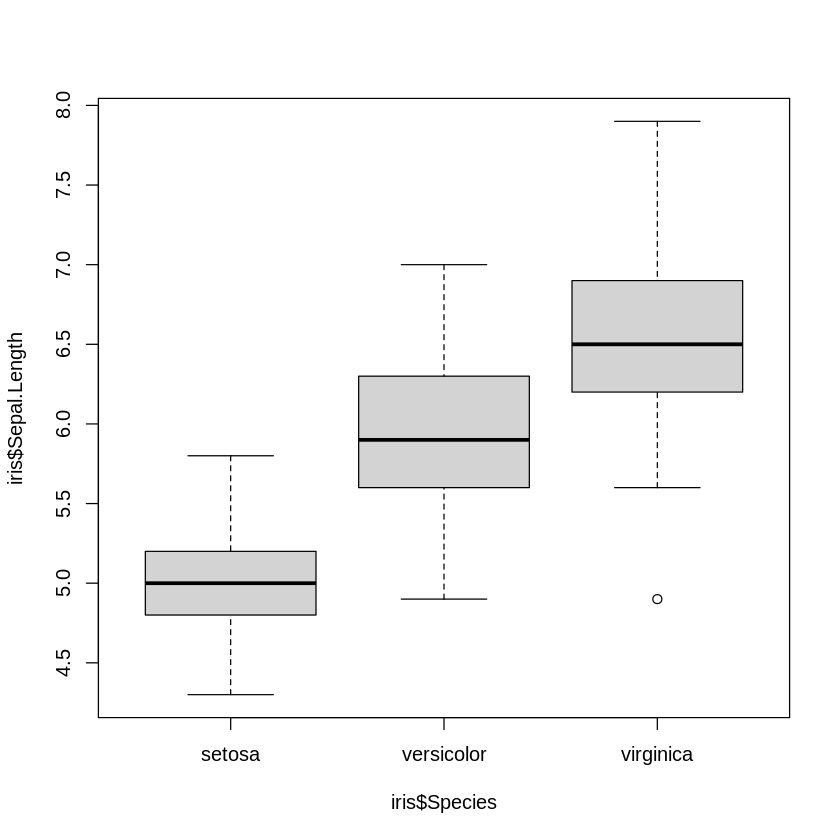

In [7]:
plot(iris$Sepal.Length, pch=19 ,col=factor(iris$Species),ylab = "Sepal length")
boxplot(iris$Sepal.Length~iris$Species)


After we remove the means in all the groups by subtracting them. The plot does not show any influence of a factor.

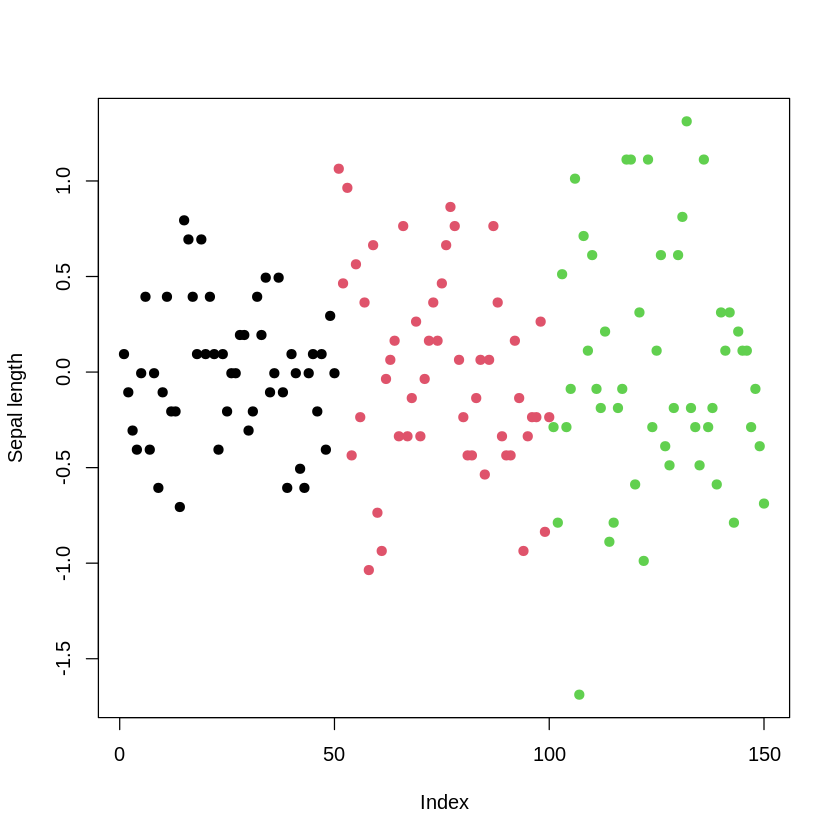

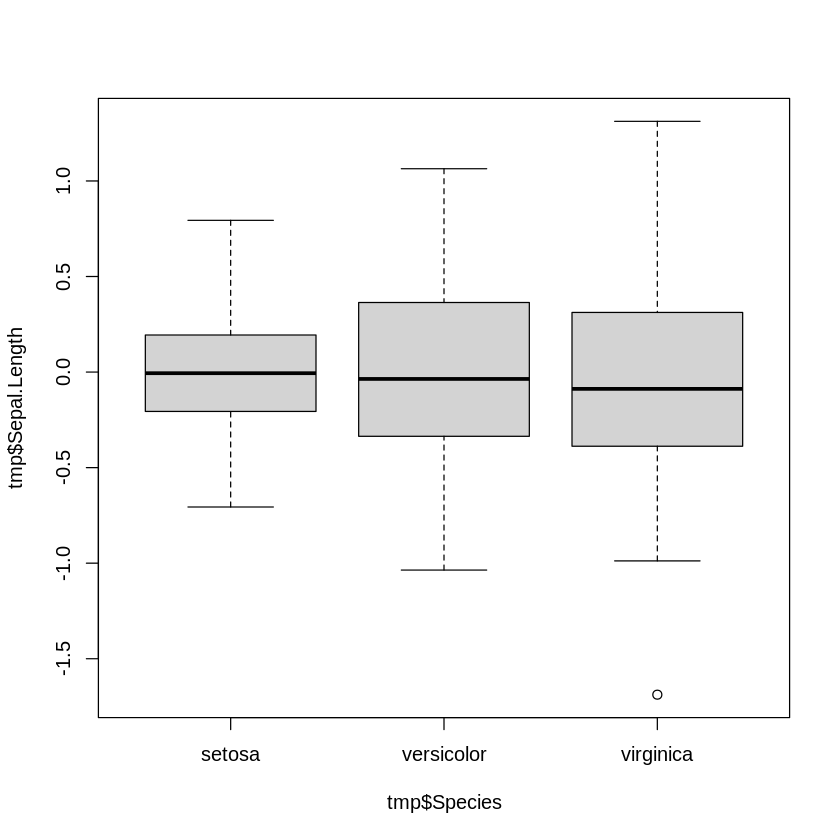

In [9]:
tmp<-iris
tmp$Sepal.Length[which(tmp$Species=="setosa")]<-tmp$Sepal.Length[which(tmp$Species=="setosa")] -mean(tmp$Sepal.Length[which(tmp$Species=="setosa")])
tmp$Sepal.Length[which(tmp$Species=="versicolor")]<-tmp$Sepal.Length[which(tmp$Species=="versicolor")]-mean(tmp$Sepal.Length[which(tmp$Species=="versicolor")])
tmp$Sepal.Length[which(tmp$Species=="virginica")]<-tmp$Sepal.Length[which(tmp$Species=="virginica")]-mean(tmp$Sepal.Length[which(tmp$Species=="virginica")])

plot(tmp$Sepal.Length, pch=19 ,col=factor(tmp$Species),ylab = "Sepal length")
boxplot(tmp$Sepal.Length~tmp$Species)

In [10]:
data(chickwts)
summary(chickwts)

     weight             feed   
 Min.   :108.0   casein   :12  
 1st Qu.:204.5   horsebean:10  
 Median :258.0   linseed  :12  
 Mean   :261.3   meatmeal :11  
 3rd Qu.:323.5   soybean  :14  
 Max.   :423.0   sunflower:12  

Here we have a graphical depicturing of the Levene test. The mean of the transformed variable captures the dispersion of the origin variable. The boxplot shows that the group means of the transformed variable does not differ so much from each other.

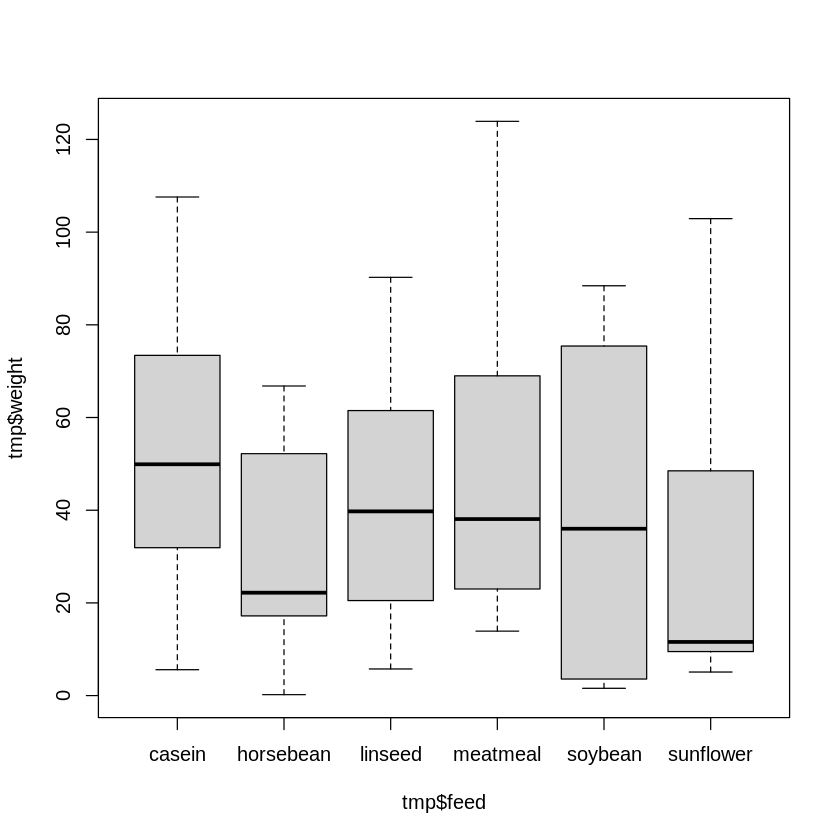

In [11]:
tmp<-chickwts
tmp$weight[which(tmp$feed=="casein")]<-abs(tmp$weight[which(tmp$feed=="casein")]-mean(tmp$weight[which(tmp$feed=="casein")]))
tmp$weight[which(tmp$feed=="horsebean")]<-abs(tmp$weight[which(tmp$feed=="horsebean")]-mean(tmp$weight[which(tmp$feed=="horsebean")]))
tmp$weight[which(tmp$feed=="linseed")]<-abs(tmp$weight[which(tmp$feed=="linseed")]-mean(tmp$weight[which(tmp$feed=="linseed")]))
tmp$weight[which(tmp$feed=="meatmeal")]<-abs(tmp$weight[which(tmp$feed=="meatmeal")]-mean(tmp$weight[which(tmp$feed=="meatmeal")]))
tmp$weight[which(tmp$feed=="soybean")]<-abs(tmp$weight[which(tmp$feed=="soybean")]-mean(tmp$weight[which(tmp$feed=="soybean")]))
tmp$weight[which(tmp$feed=="sunflower")]<-abs(tmp$weight[which(tmp$feed=="sunflower")]-mean(tmp$weight[which(tmp$feed=="sunflower")]))
boxplot(tmp$weight~tmp$feed)

In [12]:
leveneTest(chickwts$weight~chickwts$feed)

Df F value   Pr(>F)   
group  5 0.7492639 0.5896095
      65        NA        NA

The chi square distribution is right skewed as we can see,  while the normal distribution is symmetrical

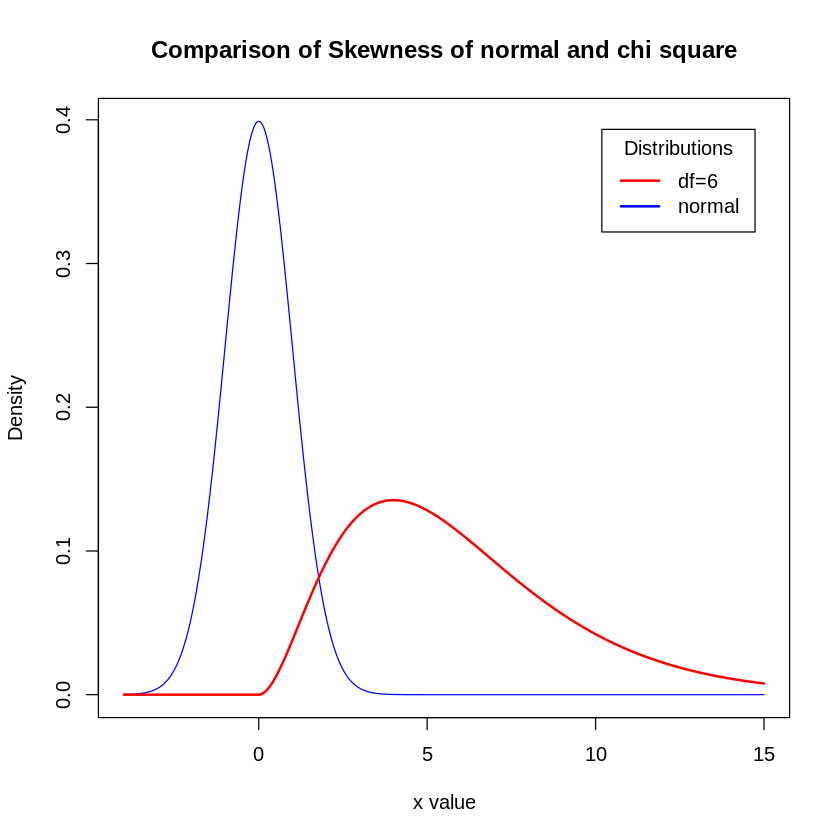

In [13]:
x <- seq(-4, 15, length=1000)
hx <- dnorm(x)
colors <- c("red", "blue")
labels <- c("df=6", "normal")

plot(x, hx, type="l", lty=1, xlab="x value",
     ylab="Density", main="Comparison of Skewness of normal and chi square",col="blue")


lines(x,dchisq(x,6),lwd=2,col="red")
legend("topright", inset=.05, title="Distributions",
       labels, lwd=2, lty=c(1, 1), col=colors)



Here we can see the difference in the kurtosis of two distributions.

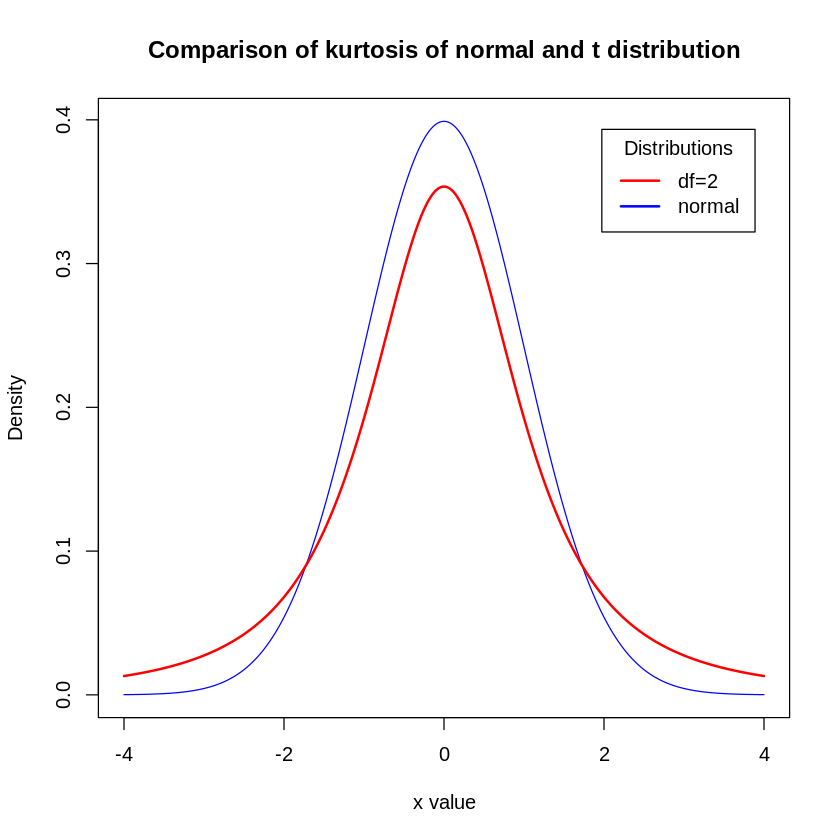

In [14]:
x <- seq(-4, 4, length=1000)
hx <- dnorm(x)


colors <- c("red", "blue")
labels <- c("df=2", "normal")

plot(x, hx, type="l", lty=1, xlab="x value",
     ylab="Density", main="Comparison of kurtosis of normal and t distribution",col="blue")


lines(x,dt(x,2),lwd=2,col="red")


legend("topright", inset=.05, title="Distributions",
       labels, lwd=2, lty=c(1, 1), col=colors)




	Jarque Bera Test

data:  chickwts$weight
X-squared = 2.4334, df = 2, p-value = 0.2962


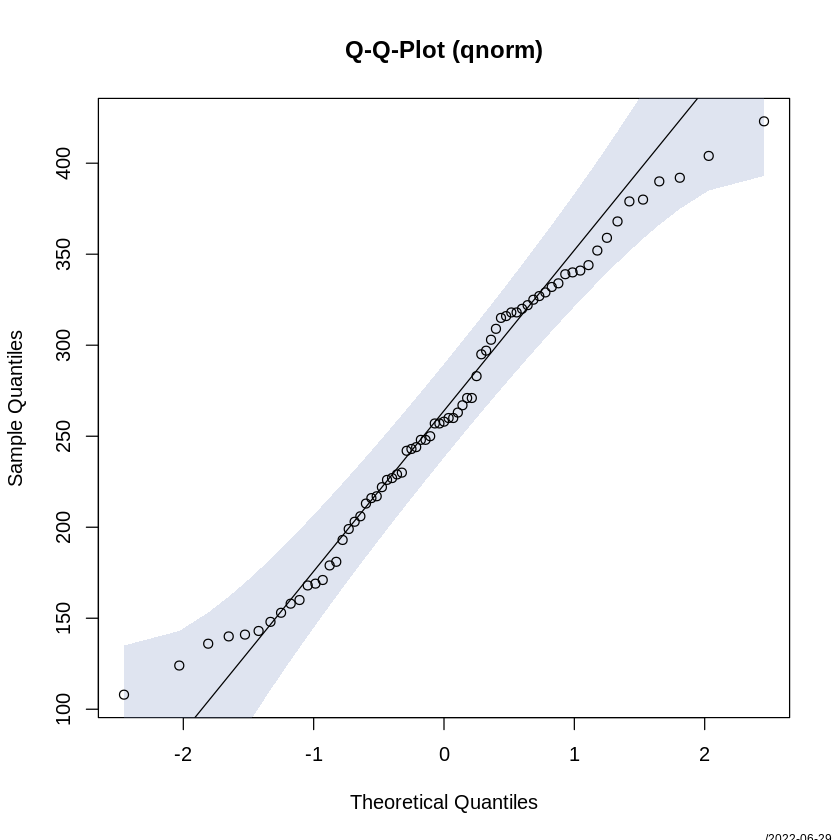

In [15]:
PlotQQ(chickwts$weight)
jarque.bera.test(chickwts$weight)

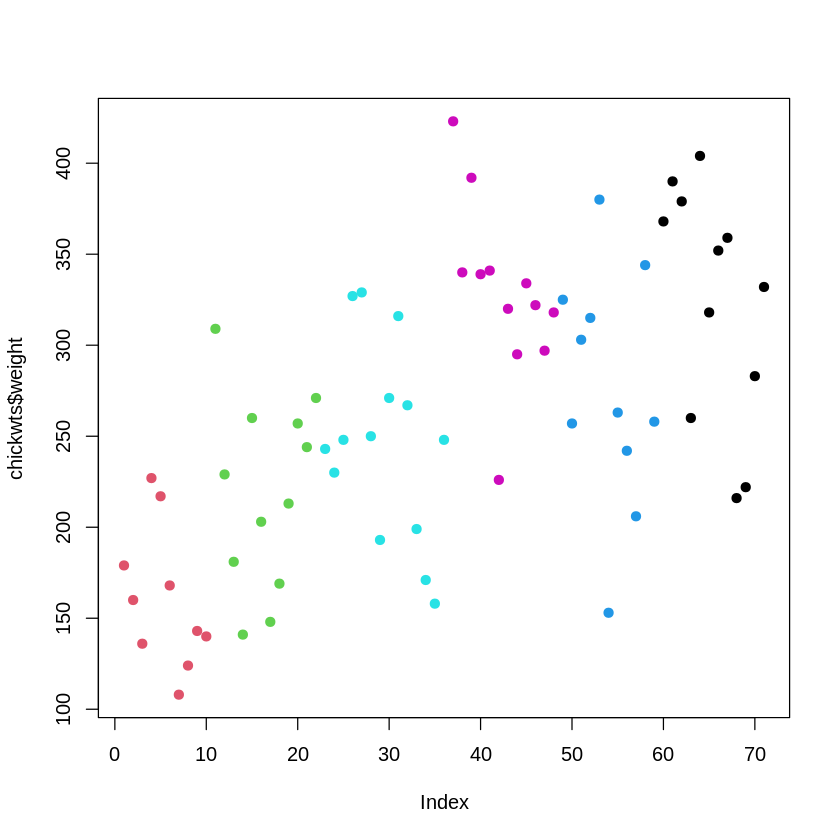

In [16]:
plot(chickwts$weight,pch=19,col=factor(chickwts$feed))
boxplot(chickwts$weight~chickwts$feed,ylab="Weight",xlab = "Feed")


The three stars next to the p-value indicate a highly significant difference in the means of the groups. The graphics above support this hypothesis.

In [17]:
summary(aov(chickwts$weight~chickwts$feed))

              Df Sum Sq Mean Sq F value   Pr(>F)    
chickwts$feed  5 231129   46226   15.37 5.94e-10 ***
Residuals     65 195556    3009                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1